In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline


In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

In [3]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
df = pd.read_csv("seoul_covid19.csv")
df

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,23459,75194,2021-01-24,타시도,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
1,23458,75327,2021-01-24,관악구,-,타시도 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
2,23457,75378,2021-01-24,관악구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
3,23456,75369,2021-01-24,종로구,-,병원 및 요양시설,치료중,21-01,21-01-24,1,3,2021-03
4,23455,75356,2021-01-24,강동구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
23454,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,20-01,20-01-31,1,5,2020-05
23455,4,7,2020-01-30,마포구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05
23456,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,20-01,20-01-30,1,5,2020-05
23457,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05


In [6]:
df["확진일"] = df["확진일"].astype(str)
day_count = df["확진일"].value_counts().sort_index()
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-01-20    122
2021-01-21    114
2021-01-22    127
2021-01-23    133
2021-01-24    102
Name: 확진일, Length: 335, dtype: int64

In [7]:
df["확진일"] = pd.to_datetime(df["확진일"])

In [8]:
first_day = df.iloc[-1,2]
first_day

Timestamp('2020-01-24 00:00:00')

In [9]:
last_day = df.iloc[0,2]
last_day

Timestamp('2021-01-24 00:00:00')

In [10]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-23', '2021-01-24'],
              dtype='datetime64[ns]', length=367, freq='D')

In [11]:
df_days = pd.DataFrame({"확진일자":days})
df_days = df_days.astype(str)
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
362,2021-01-20
363,2021-01-21
364,2021-01-22
365,2021-01-23


In [12]:
daliy_case = day_count
df_daliy_case = pd.DataFrame({"확진수": daliy_case})
df_daliy_case.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 2020-01-24 to 2021-01-24
Data columns (total 1 columns):
확진수    335 non-null int64
dtypes: int64(1)
memory usage: 15.2+ KB


In [13]:
df_days.merge(df_daliy_case,left_on="확진일자",right_on=df_daliy_case.index,how="left")

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
362,2021-01-20,122.0
363,2021-01-21,114.0
364,2021-01-22,127.0
365,2021-01-23,133.0


In [14]:
all_day = df_days.merge(df_daliy_case,left_on="확진일자",right_on=df_daliy_case.index,how="left")
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
362,2021-01-20,122.0
363,2021-01-21,114.0
364,2021-01-22,127.0
365,2021-01-23,133.0


In [15]:
all_day["누적확진수"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진수
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
362,2021-01-20,122.0,22983.0
363,2021-01-21,114.0,23097.0
364,2021-01-22,127.0,23224.0
365,2021-01-23,133.0,23357.0


In [16]:
all_day["확진일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-8:])
all_day.head()

,확진일자,확진수,누적확진수
0,20-01-24,1.0,1.0
1,20-01-25,NaN,1.0
2,20-01-26,NaN,1.0
3,20-01-27,NaN,1.0
4,20-01-28,NaN,1.0


In [17]:
all_cum_day = all_day[["확진일자","확진수","누적확진수"]]
all_cum_day.head()

,확진일자,확진수,누적확진수
0,20-01-24,1.0,1.0
1,20-01-25,NaN,1.0
2,20-01-26,NaN,1.0
3,20-01-27,NaN,1.0
4,20-01-28,NaN,1.0


<AxesSubplot:>

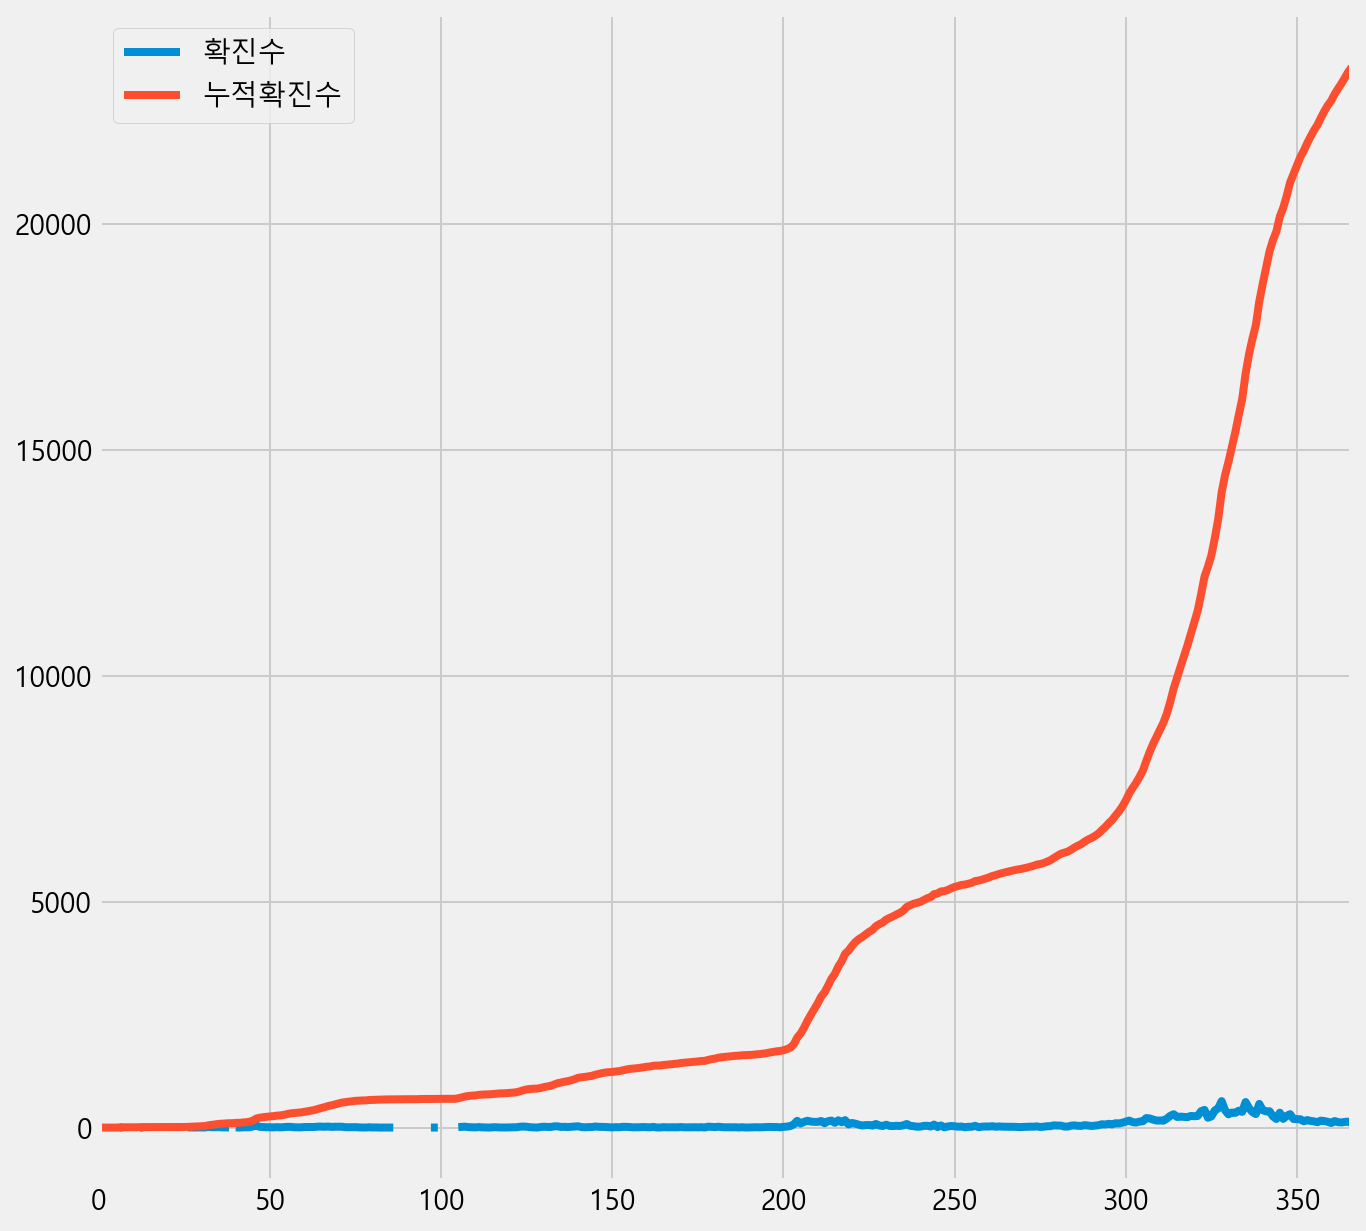

In [18]:
all_cum_day.plot(figsize=(10,10))

In [19]:
all_cum_day = all_cum_day.set_index("확진일자")
all_cum_day

,확진수,누적확진수
확진일자,,
20-01-24,1.0,1.0
20-01-25,NaN,1.0
20-01-26,NaN,1.0
20-01-27,NaN,1.0
20-01-28,NaN,1.0
...,...,...
21-01-20,122.0,22983.0
21-01-21,114.0,23097.0
21-01-22,127.0,23224.0


C:\Users\SANGMIN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='확진일자'>

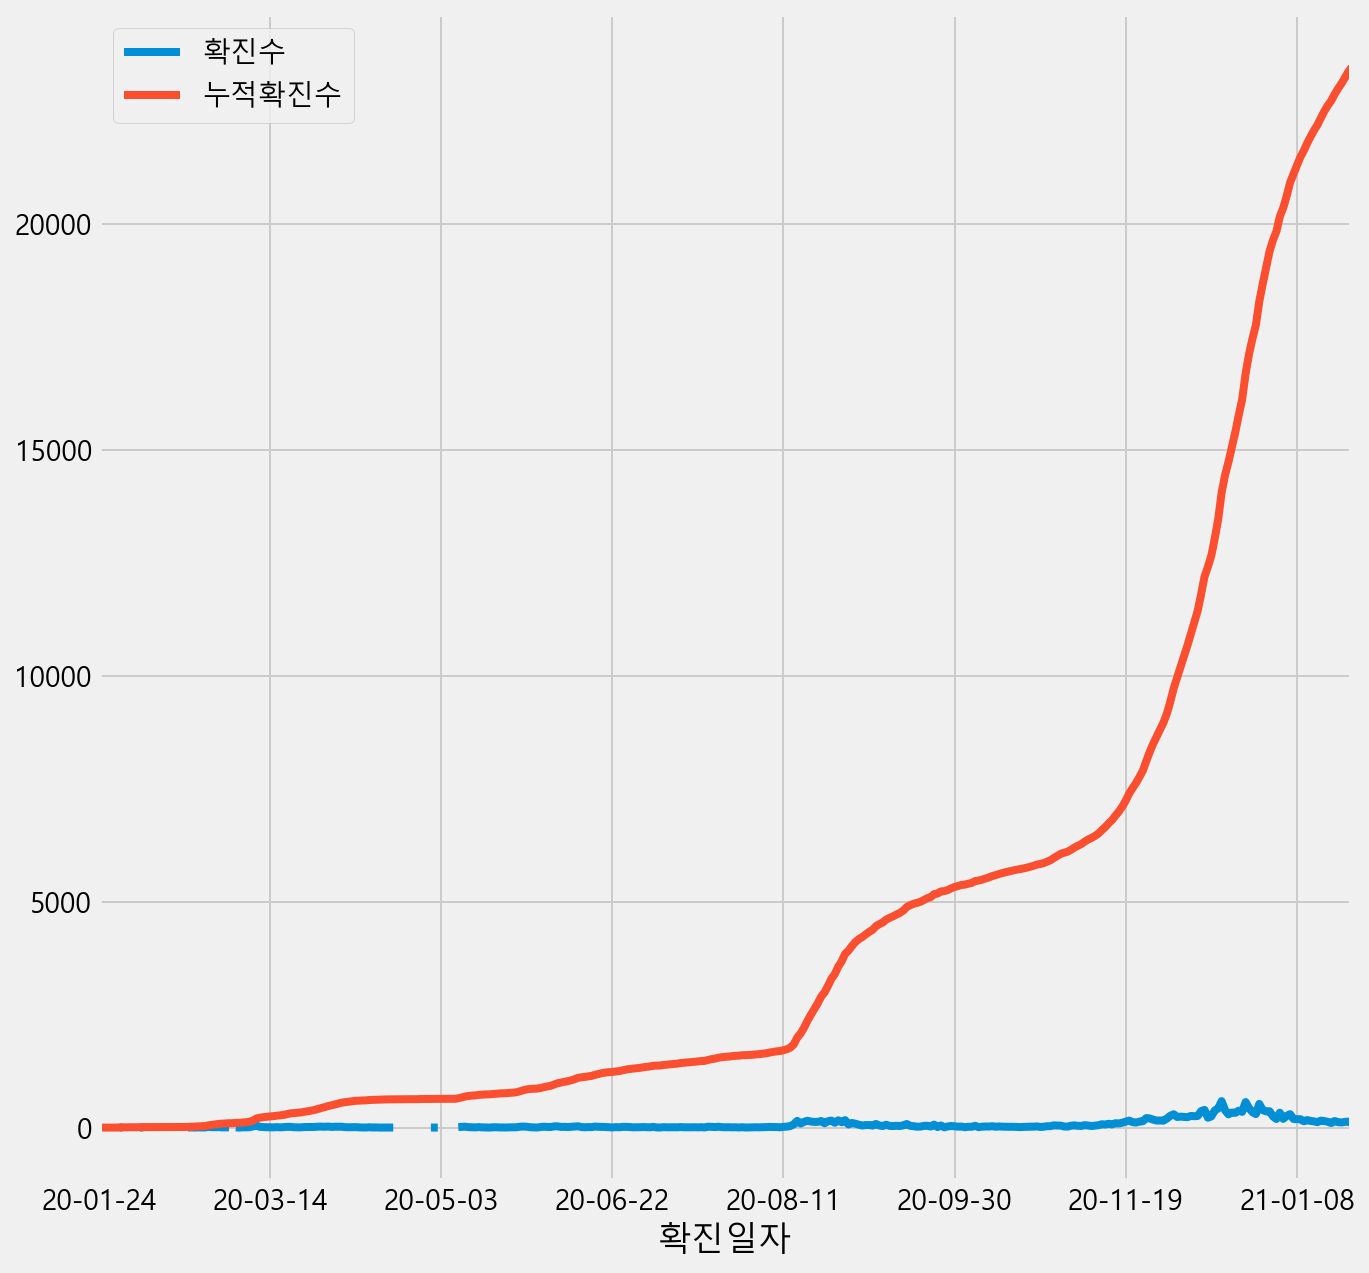

In [20]:
all_cum_day.plot(figsize=(10,10))

C:\Users\SANGMIN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'확진수'}, xlabel='확진일자'>

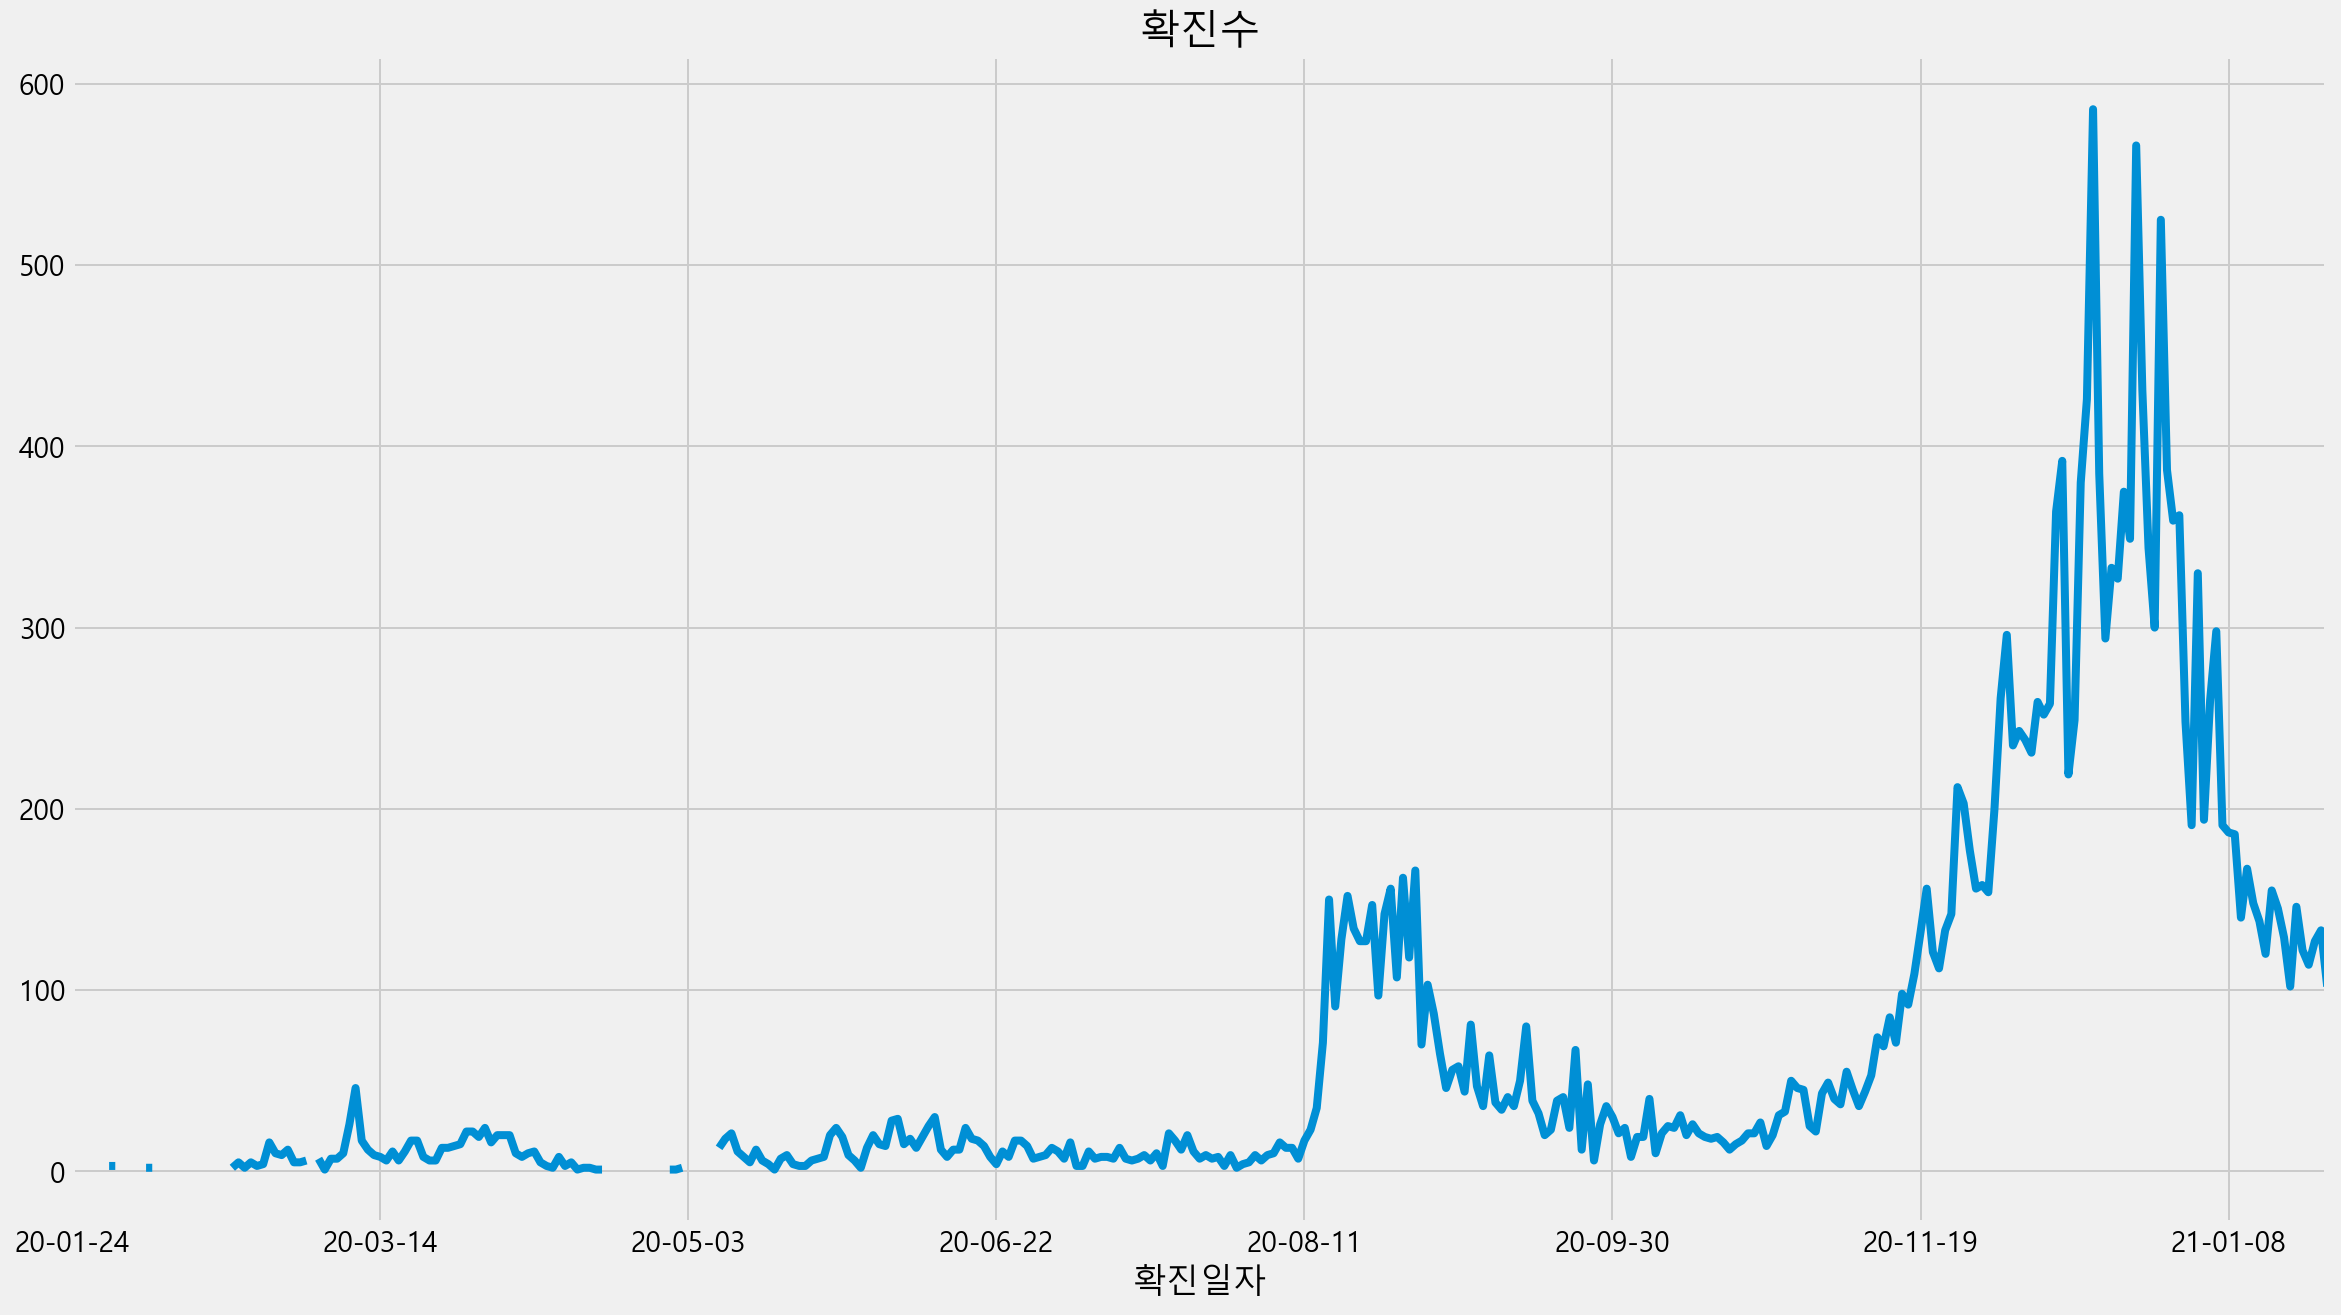

In [21]:
all_cum_day["확진수"].plot(figsize=(18,10),title="확진수")

C:\Users\SANGMIN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'누적확진수'}, xlabel='확진일자'>

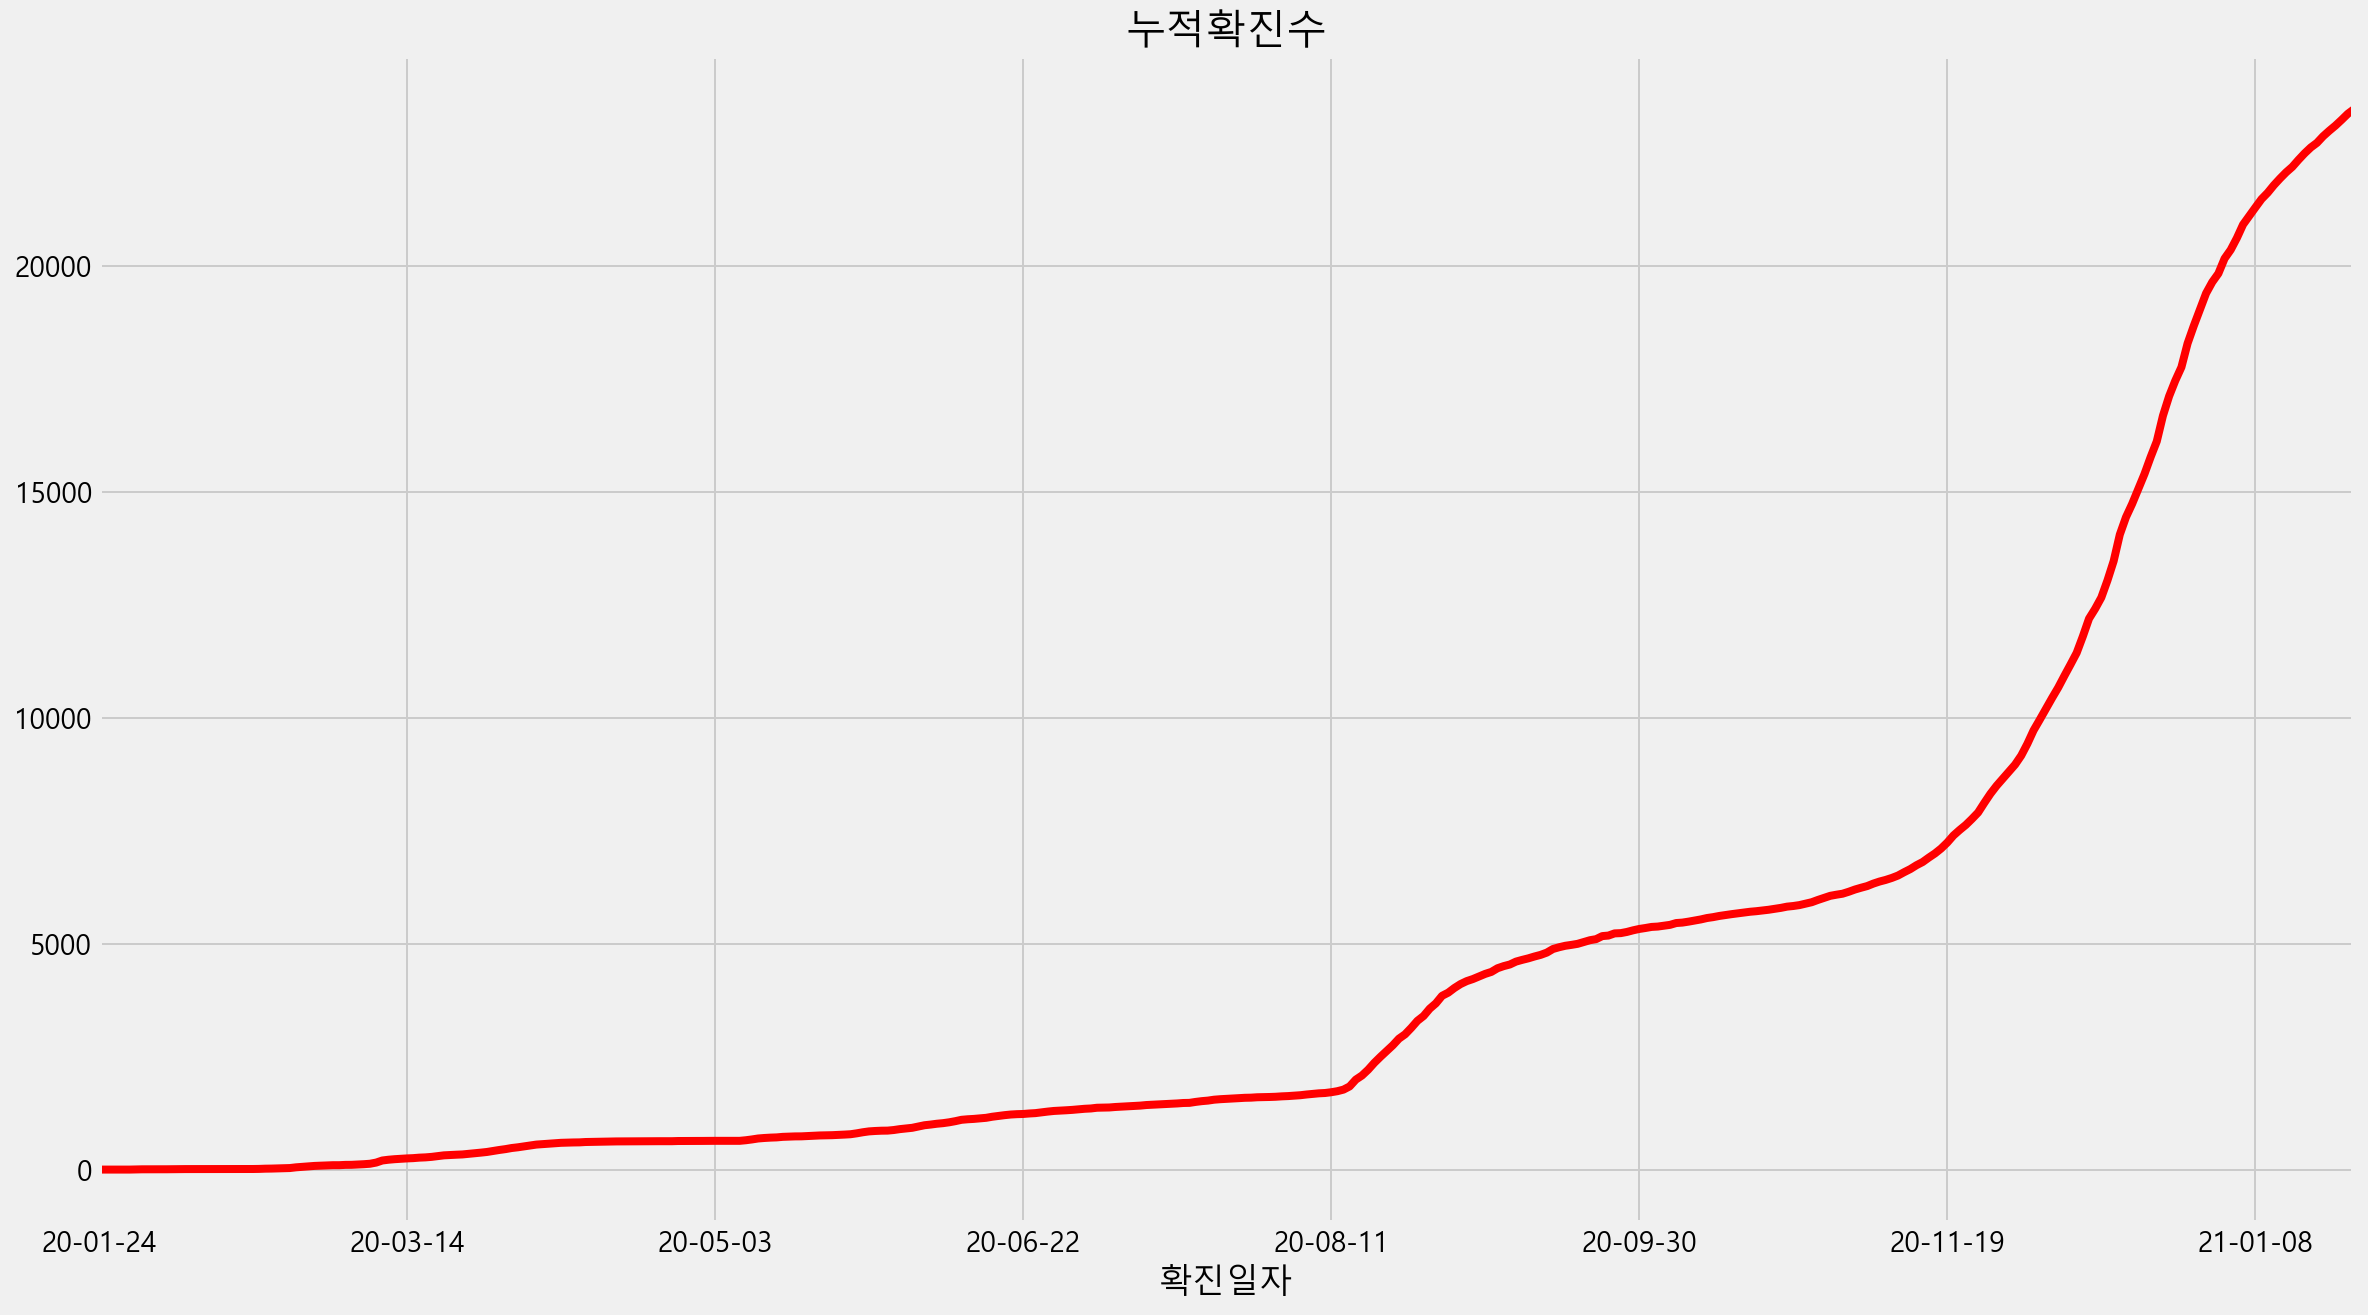

In [22]:
all_cum_day ["누적확진수"].plot(figsize=(18,10),title="누적확진수",color="red")